In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalizing and reshaping data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


Regular model

In [ ]:
from tensorflow.keras import layers, models

def build_regular_cnn_adjusted():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), strides=2, padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', strides=2, padding='same'))
    # Following layers adjusted with consideration for dimensionality reduction
    model.add(layers.Conv2D(128, (3, 3), activation='relu', strides=2, padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', strides=2, padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', strides=2, padding='same'))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))
    return model

model = build_regular_cnn_adjusted()
#model.compile(optimizer='adam', # Try different optimizers
              #loss='categorical_crossentropy',
              #metrics=['accuracy'])

#history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

from tensorflow.keras.optimizers import Adam, SGD, RMSprop

model.compile(optimizer=RMSprop(learning_rate=.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 252s 129ms/step - loss: 0.1867 - accuracy: 0.9411 - val_loss: 0.0742 - val_accuracy: 0.9786
Epoch 2/10
1500/1500 [==============================] - 197s 131ms/step - loss: 0.0598 - accuracy: 0.9820 - val_loss: 0.0691 - val_accuracy: 0.9795
Epoch 3/10
1500/1500 [==============================] - 196s 130ms/step - loss: 0.0401 - accuracy: 0.9880 - val_loss: 0.0516 - val_accuracy: 0.9856
Epoch 4/10
1500/1500 [==============================] - 195s 130ms/step - loss: 0.0293 - accuracy: 0.9911 - val_loss: 0.0518 - val_accuracy: 0.9872
Epoch 5/10
1500/1500 [==============================] - 195s 130ms/step - loss: 0.0218 - accuracy: 0.9935 - val_loss: 0.0494 - val_accuracy: 0.9877
Epoch 6/10
1500/1500 [==============================] - 202s 135ms/step - loss: 0.0167 - accuracy: 0.9951 - val_loss: 0.0723 - val_accuracy: 0.9868
Epoch 7/10
1500/1500 [==============================] - 194s 129ms/step - loss: 0.0151 - accuracy: 0.9955 - val_

I found that for the best results, using RMSprop, a learning rate of .001, and a batch size of 32. The reason that these produced the best results is the learning rate was a good medium for getting good convergence speed and not small enough where it takes too long to train. For the batch size, 32 was a good medium ground for efficiency, as well as having good generalization. For the optimizer, they were basically all getting the same amount of accuracy, so either of the three were a good choice here.

Inverted model

In [ ]:
#from tensorflow.keras import layers, models

def build_inverted_cnn_adjusted():
    model = models.Sequential()
    model.add(layers.Conv2D(512, (3, 3), activation='relu', input_shape=(28, 28, 1), strides=2, padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', strides=2, padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', strides=2, padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', strides=2, padding='same'))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', strides=2, padding='same'))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))
    return model

inverted_model = build_inverted_cnn_adjusted()
inverted_model.compile(optimizer=Adam(learning_rate=.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

inverted_history = inverted_model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 471s 313ms/step - loss: 0.1712 - accuracy: 0.9467 - val_loss: 0.0908 - val_accuracy: 0.9748
Epoch 2/10
1500/1500 [==============================] - 474s 316ms/step - loss: 0.0612 - accuracy: 0.9815 - val_loss: 0.0688 - val_accuracy: 0.9808
Epoch 3/10
1500/1500 [==============================] - 472s 315ms/step - loss: 0.0419 - accuracy: 0.9872 - val_loss: 0.0509 - val_accuracy: 0.9845
Epoch 4/10
1500/1500 [==============================] - 475s 317ms/step - loss: 0.0318 - accuracy: 0.9897 - val_loss: 0.0705 - val_accuracy: 0.9814
Epoch 5/10
1500/1500 [==============================] - 477s 318ms/step - loss: 0.0246 - accuracy: 0.9928 - val_loss: 0.0653 - val_accuracy: 0.9842
Epoch 6/10
1500/1500 [==============================] - 482s 321ms/step - loss: 0.0206 - accuracy: 0.9939 - val_loss: 0.0527 - val_accuracy: 0.9877
Epoch 7/10
1500/1500 [==============================] - 489s 326ms/step - loss: 0.0197 - accuracy: 0.9937 - val_

For this model I found the hyperparameters of an Adam optimizer, learning rate of .001, and a batch size of 32 to be able to give me the best results. The reasoning for the learning rate and batch size is the same as explained above, but this time the Adam optimizer is actually the best, I think this is because since the number of filter decreases as you go deeper, Adam's adaptive learning rates and ability to handle sparse gradients make it the best optimizer for the job

Hourglass model

In [ ]:
def build_hourglass_cnn_adjusted():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), strides=2, padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', strides=2, padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', strides=2, padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', strides=2, padding='same'))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', strides=2, padding='same'))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))
    return model


hourglass_model = build_hourglass_cnn_adjusted()
hourglass_model.compile(optimizer=Adam(learning_rate=.001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

hourglass_history = hourglass_model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.2381 - accuracy: 0.9262 - val_loss: 0.1023 - val_accuracy: 0.9721
Epoch 2/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0710 - accuracy: 0.9781 - val_loss: 0.0683 - val_accuracy: 0.9798
Epoch 3/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.0489 - accuracy: 0.9846 - val_loss: 0.0526 - val_accuracy: 0.9845
Epoch 4/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.0355 - accuracy: 0.9886 - val_loss: 0.0500 - val_accuracy: 0.9859
Epoch 5/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.0281 - accuracy: 0.9912 - val_loss: 0.0633 - val_accuracy: 0.9828
Epoch 6/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.0209 - accuracy: 0.9929 - val_loss: 0.0541 - val_accuracy: 0.9869
Epoch 7/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0200 - accuracy: 0.9931 - val_loss: 0.0552 -

For this model, I landed on the hyperparameters of an Adam optimizer(when I used RGP it was severely worse, and when I used RMSprop it was basically the same, so I just went with Adam). A learning rate of .001(for the same reasons as the other two models), and a batch size of 32(for again the same reasons as the other models)

Epoch 1/25
782/782 [==============================] - 34s 42ms/step - loss: 1.7121 - accuracy: 0.3729 - val_loss: 1.5557 - val_accuracy: 0.4411
Epoch 2/25
782/782 [==============================] - 33s 42ms/step - loss: 1.4332 - accuracy: 0.4803 - val_loss: 1.4584 - val_accuracy: 0.4888
Epoch 3/25
782/782 [==============================] - 32s 41ms/step - loss: 1.3286 - accuracy: 0.5232 - val_loss: 1.2812 - val_accuracy: 0.5420
Epoch 4/25
782/782 [==============================] - 32s 40ms/step - loss: 1.2447 - accuracy: 0.5551 - val_loss: 1.2531 - val_accuracy: 0.5546
Epoch 5/25
782/782 [==============================] - 32s 41ms/step - loss: 1.1834 - accuracy: 0.5795 - val_loss: 1.2086 - val_accuracy: 0.5717
Epoch 6/25
782/782 [==============================] - 32s 41ms/step - loss: 1.1331 - accuracy: 0.5972 - val_loss: 1.1631 - val_accuracy: 0.5840
Epoch 7/25
782/782 [==============================] - 33s 42ms/step - loss: 1.0876 - accuracy: 0.6171 - val_loss: 1.1432 - val_accuracy:

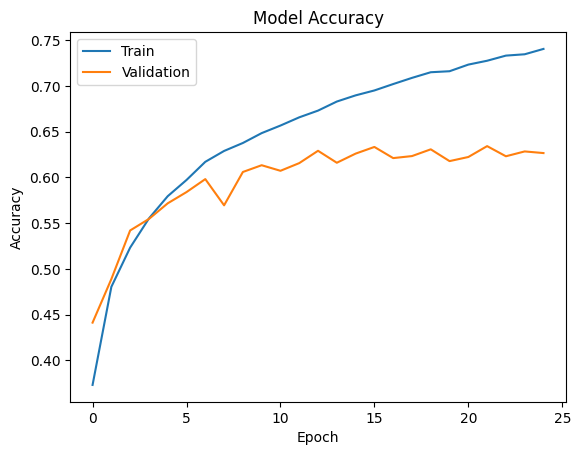

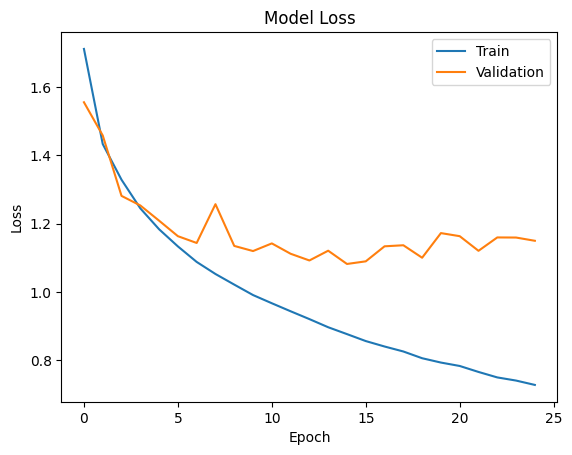

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

model = models.Sequential([
    # Layer 1: Convolutional
    layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(32, 32, 3)),
    # Layer 2: Max-Pooling
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    # Layer 3: Convolutional
    layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu'),
    # Layer 4: Max-Pooling
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    # Layer 5: Convolutional
    layers.Conv2D(120, kernel_size=(5, 5), activation='relu'),
    # Flatten the output of the convolutional layers before passing it to the dense layers
    layers.Flatten(),
    # Layer 6: Dense
    layers.Dense(84, activation='relu'),
    # Layer 7: Output Layer
    layers.Dense(10, activation='softmax')
])

learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=25, batch_size=64, validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}')

model.summary()
import matplotlib.pyplot as plt

def plot_accuracy(history, title='Model Accuracy'):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_accuracy(history)
def plot_loss(history, title='Model Loss'):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

plot_loss(history)


Problem 2


1.   .001 was the best learning rate. Too high caused the model to converge too quickly, and too low would lead to it converging not fast enough
2.   64 ended up being the best batch size for the model, as it was high enough for good efficiency, and low enough for good generalization
3. A learning rate of .001 and batch size of 64 ended up being the best hyperparameters for the model.



Epoch 1/25
782/782 [==============================] - 4s 4ms/step - loss: 2.1021 - accuracy: 0.1759 - val_loss: 2.0454 - val_accuracy: 0.1842
Epoch 2/25
782/782 [==============================] - 3s 4ms/step - loss: 2.0467 - accuracy: 0.1946 - val_loss: 2.0410 - val_accuracy: 0.1979
Epoch 3/25
782/782 [==============================] - 4s 5ms/step - loss: 2.0425 - accuracy: 0.1973 - val_loss: 2.0577 - val_accuracy: 0.1931
Epoch 4/25
782/782 [==============================] - 3s 4ms/step - loss: 2.0371 - accuracy: 0.1976 - val_loss: 2.0246 - val_accuracy: 0.1916
Epoch 5/25
782/782 [==============================] - 3s 4ms/step - loss: 2.0323 - accuracy: 0.2001 - val_loss: 2.0253 - val_accuracy: 0.2046
Epoch 6/25
782/782 [==============================] - 3s 4ms/step - loss: 2.0324 - accuracy: 0.1989 - val_loss: 2.0211 - val_accuracy: 0.2080
Epoch 7/25
782/782 [==============================] - 4s 5ms/step - loss: 2.0272 - accuracy: 0.2049 - val_loss: 2.0285 - val_accuracy: 0.2058
Epoch 

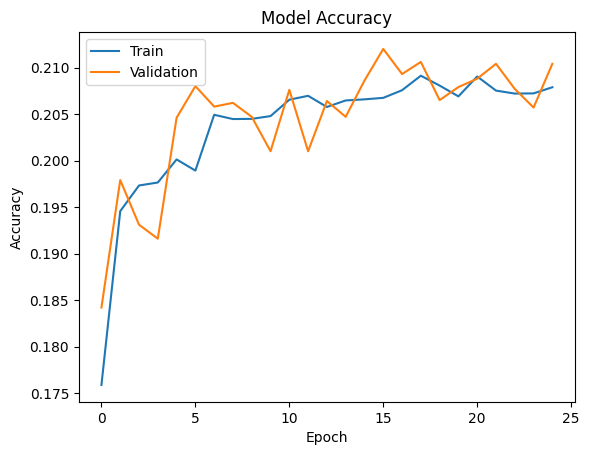

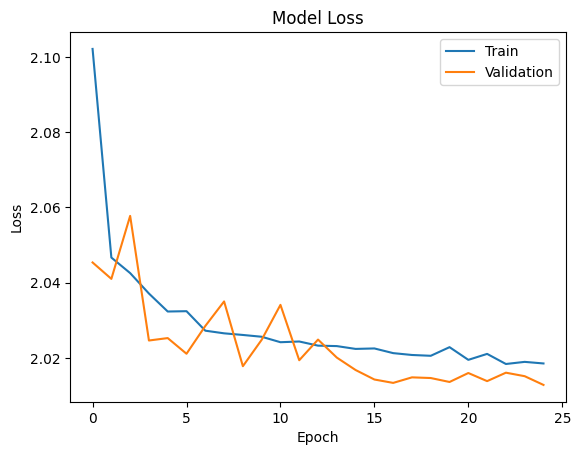

In [ ]:

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images.reshape((50000, 32 * 32 * 3)).astype('float32') / 255
test_images = test_images.reshape((10000, 32 * 32 * 3)).astype('float32') / 255

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

model = models.Sequential()
model.add(layers.Dense(6, activation='relu', input_shape=(32 * 32 * 3,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=25, batch_size=64, validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}')
model.summary()
import matplotlib.pyplot as plt

def plot_accuracy(history, title='Model Accuracy'):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_accuracy(history)
def plot_loss(history, title='Model Loss'):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

plot_loss(history)


Problem 2 continued


4.  <br>
a. Its performance was quite poor, ending with a test accuracy of 37% and a test loss of 1.7, which suggests that the model is not able to capture the spacial hierarchies <br>
b. There were 110058 parameters in this model compared to the 62006 parameters in the LeNet, from the outputs it is obviously not worth it, because it was less accurate and had more test loss with more parameters

